# Assignment 2


#### 1. 复习上课内容以及复现课程代码

在本部分，你需要在复习上课内容和课程代码后，复现课程代码。 

In [350]:
import re
import matplotlib.pyplot as plt
import networkx as nx
%matplotlib inline
from collections import defaultdict
import pprint

In [1]:
coordination_source = """
{name:'兰州', geoCoord:[103.73, 36.03]},
{name:'嘉峪关', geoCoord:[98.17, 39.47]},
{name:'西宁', geoCoord:[101.74, 36.56]},
{name:'成都', geoCoord:[104.06, 30.67]},
{name:'石家庄', geoCoord:[114.48, 38.03]},
{name:'拉萨', geoCoord:[102.73, 25.04]},
{name:'贵阳', geoCoord:[106.71, 26.57]},
{name:'武汉', geoCoord:[114.31, 30.52]},
{name:'郑州', geoCoord:[113.65, 34.76]},
{name:'济南', geoCoord:[117, 36.65]},
{name:'南京', geoCoord:[118.78, 32.04]},
{name:'合肥', geoCoord:[117.27, 31.86]},
{name:'杭州', geoCoord:[120.19, 30.26]},
{name:'南昌', geoCoord:[115.89, 28.68]},
{name:'福州', geoCoord:[119.3, 26.08]},
{name:'广州', geoCoord:[113.23, 23.16]},
{name:'长沙', geoCoord:[113, 28.21]},
//{name:'海口', geoCoord:[110.35, 20.02]},
{name:'沈阳', geoCoord:[123.38, 41.8]},
{name:'长春', geoCoord:[125.35, 43.88]},
{name:'哈尔滨', geoCoord:[126.63, 45.75]},
{name:'太原', geoCoord:[112.53, 37.87]},
{name:'西安', geoCoord:[108.95, 34.27]},
//{name:'台湾', geoCoord:[121.30, 25.03]},
{name:'北京', geoCoord:[116.46, 39.92]},
{name:'上海', geoCoord:[121.48, 31.22]},
{name:'重庆', geoCoord:[106.54, 29.59]},
{name:'天津', geoCoord:[117.2, 39.13]},
{name:'呼和浩特', geoCoord:[111.65, 40.82]},
{name:'南宁', geoCoord:[108.33, 22.84]},
//{name:'西藏', geoCoord:[91.11, 29.97]},
{name:'银川', geoCoord:[106.27, 38.47]},
{name:'乌鲁木齐', geoCoord:[87.68, 43.77]},
{name:'香港', geoCoord:[114.17, 22.28]},
{name:'澳门', geoCoord:[113.54, 22.19]}
"""

In [23]:
geo = "{name:'澳门', geoCoord:[113.54, 22.19]}"
#geo = re.findall("Coord:\[(\d+.\d+),\s(\d+.\d+)\]",geo)[0]
#geo = tuple(map(float,geo))
re.findall("name:'(\w+)'",geo)

['澳门']

In [24]:
#data cleaning
def data_clean(string):
    location_dict = {}
    for line in string.split('\n'):
        if line.startswith('//'):
            continue
        if line == '':
            continue
            
        loc = re.findall("name:'(\w+)'",line)[0]
        geo = re.findall("Coord:\[(\d+.\d+),\s(\d+.\d+)\]",line)[0]
        geo = tuple(map(float,geo))
        
        location_dict[loc] = geo
    
    return location_dict

In [25]:
city_dict = data_clean(coordination_source)

In [26]:
city_dict

{'兰州': (103.73, 36.03),
 '嘉峪关': (98.17, 39.47),
 '西宁': (101.74, 36.56),
 '成都': (104.06, 30.67),
 '石家庄': (114.48, 38.03),
 '拉萨': (102.73, 25.04),
 '贵阳': (106.71, 26.57),
 '武汉': (114.31, 30.52),
 '郑州': (113.65, 34.76),
 '济南': (117.0, 36.65),
 '南京': (118.78, 32.04),
 '合肥': (117.27, 31.86),
 '杭州': (120.19, 30.26),
 '南昌': (115.89, 28.68),
 '福州': (119.3, 26.08),
 '广州': (113.23, 23.16),
 '长沙': (113.0, 28.21),
 '沈阳': (123.38, 41.8),
 '长春': (125.35, 43.88),
 '哈尔滨': (126.63, 45.75),
 '太原': (112.53, 37.87),
 '西安': (108.95, 34.27),
 '北京': (116.46, 39.92),
 '上海': (121.48, 31.22),
 '重庆': (106.54, 29.59),
 '天津': (117.2, 39.13),
 '呼和浩特': (111.65, 40.82),
 '南宁': (108.33, 22.84),
 '银川': (106.27, 38.47),
 '乌鲁木齐': (87.68, 43.77),
 '香港': (114.17, 22.28),
 '澳门': (113.54, 22.19)}

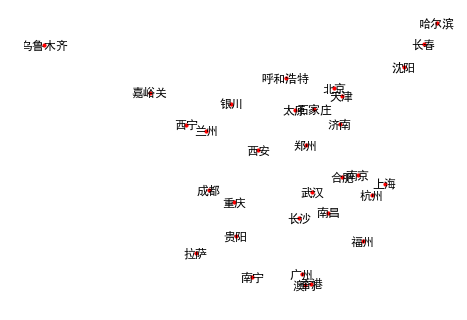

In [30]:
#distance calculation
plt.rcParams['font.sans-serif'] = ['SimHei']
plt.rcParams['axes.unicode_minus'] = False

city_graph = nx.Graph()
city_graph.add_nodes_from(list(city_dict.keys()))
nx.draw(city_graph,city_dict,with_labels = True,node_size = 10)

In [32]:
import math

def geo_distance(origin, destination):
    lat1, lon1 = origin
    lat2, lon2 = destination
    radius = 6371  # km

    dlat = math.radians(lat2 - lat1)
    dlon = math.radians(lon2 - lon1)
    a = (math.sin(dlat / 2) * math.sin(dlat / 2) +
         math.cos(math.radians(lat1)) * math.cos(math.radians(lat2)) *
         math.sin(dlon / 2) * math.sin(dlon / 2))
    c = 2 * math.atan2(math.sqrt(a), math.sqrt(1 - a))
    d = radius * c

    return d

def get_distance(city1,city2):
    return geo_distance(city_dict[city1],city_dict[city2])

In [34]:
def get_connection(city_info):
    cities = list(city_info.keys())
    city_connection = defaultdict(list)
    
    for c1 in cities:
        for c2 in cities:
            if c1 == c2:
                continue
            if get_distance(c1,c2) < 700:
                city_connection[c1].append(c2)
                
    return city_connection

In [35]:
city_connection = get_connection(city_dict)
city_connection

defaultdict(list,
            {'兰州': ['嘉峪关', '西宁', '成都', '拉萨', '贵阳', '西安', '重庆', '南宁', '银川'],
             '嘉峪关': ['兰州', '西宁', '成都', '拉萨'],
             '西宁': ['兰州', '嘉峪关', '成都', '拉萨', '贵阳', '重庆', '银川'],
             '成都': ['兰州', '嘉峪关', '西宁', '拉萨', '贵阳', '西安', '重庆', '南宁', '银川'],
             '石家庄': ['武汉',
              '郑州',
              '济南',
              '南京',
              '合肥',
              '南昌',
              '广州',
              '长沙',
              '太原',
              '西安',
              '北京',
              '天津',
              '呼和浩特'],
             '拉萨': ['兰州', '嘉峪关', '西宁', '成都', '贵阳', '重庆', '南宁', '银川'],
             '贵阳': ['兰州', '西宁', '成都', '拉萨', '西安', '重庆', '南宁', '银川'],
             '武汉': ['石家庄',
              '郑州',
              '济南',
              '南京',
              '合肥',
              '杭州',
              '南昌',
              '福州',
              '广州',
              '长沙',
              '太原',
              '西安',
              '北京',
              '天津',
              '呼和浩特',
  

In [50]:
city_connection['上海']

['济南', '南京', '合肥', '杭州', '南昌', '福州', '沈阳', '天津']

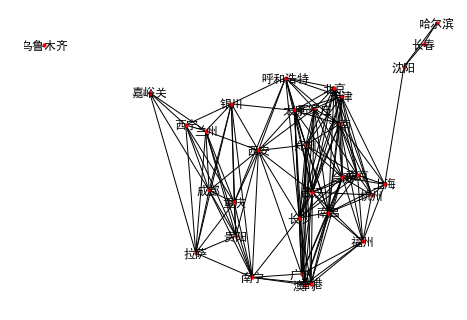

In [38]:
connection_graph = nx.Graph(city_connection)
nx.draw(connection_graph,city_dict, with_labels = True, node_size = 10)

In [61]:
#BFS search
def bfs(graph,start,end):
    paths = [[start]]
    visited = set()
    
    while paths:
        path = paths.pop(0)
        frontier = path[-1]
        if frontier in visited: 
            continue
        for city in graph[frontier]:
            #print(city)
            if not city: continue
            if city in path:continue
            if city == end:
                return path+[city]
            
            paths.append(path + [city])
            #print(paths)
        visited.add(frontier)

In [62]:
bfs(city_connection,"上海","香港")

['上海', '合肥', '香港']

In [65]:
#dfs search
def dfs(graph,start,end):
    paths = [[start]]
    visited = set()
    
    while paths:
        path = paths.pop(0)
        frontier = path[-1]
        if frontier in visited: 
            continue
        for city in graph[frontier]:
            if not city: continue
            if city in path:continue
            new_path = path+[city]
            if city == end:
                return new_path
            
            paths = [new_path] + paths
        visited.add(frontier)

In [66]:
dfs(city_connection,"上海","香港")

['上海', '天津', '呼和浩特', '银川', '南宁', '香港']

In [448]:
#optimal search
def bfs_optimal(graph,start,end,search_strategy):
    paths = [[start]]

    while paths:
        #print('number of check',i)
        path = paths.pop(0)
        frontier = path[-1]

        for city in graph[frontier]:
            #print(city)
            if not city: continue
            if city in path:continue
            
            paths.append(path + [city])
            
        paths = search_strategy(paths)
#         print(paths)
#         print('shortest path is',paths[0])

        if paths and (paths[0][-1] == end):
            return paths[0]

In [151]:
def sort_dis(paths):
    def path_dist(path):
        dis = 0
        for i,_ in enumerate(path[:-1]):
            dis += get_distance(path[i],path[i+1])
        return dis
    return sorted(paths,key = path_dist)

In [449]:
bfs_optimal(city_connection,'上海','福州',search_strategy=sort_dis)

['上海', '福州']

In [140]:
city_connection['上海']

['济南', '南京', '合肥', '杭州', '南昌', '福州', '沈阳', '天津']

# ML

In [451]:
from sklearn.datasets import load_boston
import random

In [452]:
dataset = load_boston()
x,y = dataset['data'],dataset['target']

In [453]:
def loss(y,y_hat):
    return sum((y_i - y_hat_i)**2 for y_i, y_hat_i in zip(list(y),list(y_hat)))/len(list(y))

In [458]:
def price(rm, k, b):
    return k * rm + b

In [459]:
# define partial derivative 
def partial_derivative_k(x, y, y_hat):
    n = len(y)
    gradient = 0
    for x_i, y_i, y_hat_i in zip(list(x),list(y),list(y_hat)):
        gradient += (y_i-y_hat_i) * x_i
    return -2/n * gradient

def partial_derivative_b(y, y_hat):
    n = len(y)
    gradient = 0
    for y_i, y_hat_i in zip(list(y),list(y_hat)):
        gradient += (y_i-y_hat_i)
    return -2 / n * gradient

In [460]:
X_rm = x[:,5]

In [461]:
k = random.random() * 200 - 100  # -100 100
b = random.random() * 200 - 100  # -100 100

learning_rate = 1e-3

iteration_num = 200 
losses = []
for i in range(iteration_num):
    
    price_use_current_parameters = [price(r, k, b) for r in X_rm]  # \hat{y}
    
    current_loss = loss(y, price_use_current_parameters)
    losses.append(current_loss)
    print("Iteration {}, the loss is {}, parameters k is {} and b is {}".format(i,current_loss,k,b))
    
    k_gradient = partial_derivative_k(X_rm, y, price_use_current_parameters)
    b_gradient = partial_derivative_b(y, price_use_current_parameters)
    
    k = k + (-1 * k_gradient) * learning_rate
    b = b + (-1 * b_gradient) * learning_rate
best_k = k
best_b = b

Iteration 0, the loss is 35755.944155603116, parameters k is 37.32098675424626 and b is -24.079769986937464
Iteration 1, the loss is 30142.296174959392, parameters k is 34.93095977795745 and b is -24.45564234776664
Iteration 2, the loss is 25411.072377248594, parameters k is 32.73680837150634 and b is -24.800722072430393
Iteration 3, the loss is 21423.562169239154, parameters k is 30.722479630486276 and b is -25.11753275888474
Iteration 4, the loss is 18062.859243038478, parameters k is 28.873236259881697 and b is -25.408391184619685
Iteration 5, the loss is 15230.434102761112, parameters k is 27.17554875382419 and b is -25.675424256548194
Iteration 6, the loss is 12843.245364803077, parameters k is 25.61699641171366 and b is -25.92058457177375
Iteration 7, the loss is 10831.305140472685, parameters k is 24.186176466523893 and b is -26.14566470308143
Iteration 8, the loss is 9135.627122570782, parameters k is 22.872620660461678 and b is -26.352310313667193
Iteration 9, the loss is 7706

Iteration 187, the loss is 44.04104619917692, parameters k is 8.162133527648962 and b is -28.691304384690305
Iteration 188, the loss is 44.041025014020676, parameters k is 8.162155859884452 and b is -28.691448213356743
Iteration 189, the loss is 44.04100382989482, parameters k is 8.16217821383908 and b is -28.691592035065717
Iteration 190, the loss is 44.040982646797225, parameters k is 8.16220058768833 and b is -28.691735850104138
Iteration 191, the loss is 44.0409614647266, parameters k is 8.16222297975721 and b is -28.691879658735406
Iteration 192, the loss is 44.04094028368153, parameters k is 8.162245388508008 and b is -28.692023461201345
Iteration 193, the loss is 44.0409191036609, parameters k is 8.16226781252903 and b is -28.692167257723963
Iteration 194, the loss is 44.0408979246637, parameters k is 8.162290250524284 and b is -28.692311048507083
Iteration 195, the loss is 44.04087674668917, parameters k is 8.162312701303987 and b is -28.69245483373783
Iteration 196, the loss i

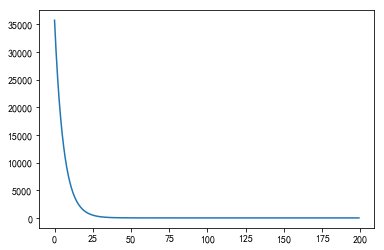

In [462]:
plt.plot(list(range(iteration_num)),losses)

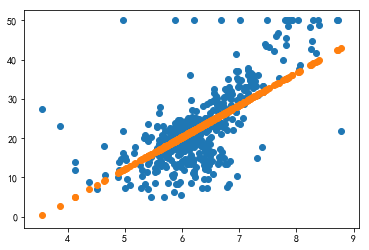

In [463]:
price_use_best_parameters = [price(r, best_k, best_b) for r in X_rm]

plt.scatter(X_rm,y)
plt.scatter(X_rm,price_use_current_parameters)

#### 2. 回答以下理论题目

###       < 评阅点 >： 答案是否正确完整

###### 2.1 What conditions are required to make the BFS return the optimal solution ?

Ans: BFS is optimal when the action is unweighted. And when estabilishing the path list, we should avoid adding those already visited nodes into the path

##### 2.2 Is there a way to make DFS find the optimal solution ? (You may need to read some material about iterative DFS)

Ans: We could try to control the depth of each search and keep adding the depth after finishing the search of each level.

##### 2.3 In what conditions BFS is a better choice than DFS and vice versa ?

When the memory is large enough, and if the requirement is to the shortest path, then BFS is better than DFS. DFS have the advantage in space complexity ( O(b*d) ), as well as if the requirement is to find all the feasible solutions.

##### 2.4 When can we use machine learning ?

Ans: ML works well when there are a lot of groud truth data and there exist a pattern in those data

##### 2.5 What is the gradient of a function ?

Ans: Gradient is a vector, that if a function change in the direction of its gradient at a certain point, then the function will have the fastest change.

##### 2.6 How can we find the maximum value of a function using the information of gradient ?

Ans: We could set the objective function to minize the negtive vlaue of this function and using gradient descent to find the minima of this objective function, which is the maximum value of the original function

#### 3. 实践部分  寻找地铁路线

### < 评阅点 >  1: 爬虫爬取数据是否完整;  2:搜索算法是否正确

In this part, although we recommend you to use Beijing subway, you still can use the subway map of any cities that you are interested in. 

![title](img/ditu.png)

Please using the search policy to implement an agent. This agent receives two input, one is @param start station and the other is @param destination. Your agent should give the optimal route based on Beijing Subway system.

Deadline: 2019-October-27

#### Procedures

#### 1. Get data from web.  

Some tips: 

a. You might need this package: requests[https://2.python-requests.org/en/master/] to get webpages

b.You might need to use Regular Expression and Beautiful Soap package to parse the webpages

In [351]:
from bs4 import  BeautifulSoup
import requests
import re
import random
import pprint

In [184]:
url = 'https://baike.baidu.com/item/%E5%8C%97%E4%BA%AC%E5%9C%B0%E9%93%81/408485'
#url = 'https://www.bjsubway.com/station/xltcx/'

In [185]:
user_agent = 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/69.0.3497.100 Safari/537.36'
headers = {'User-Agent':user_agent}

In [187]:
response = requests.get(url,headers = headers)

In [188]:
soup = BeautifulSoup(response.content,'html.parser',from_encoding='utf-8')

In [326]:
lines = set()
for link in soup.findAll("table")[1].findAll("a"):
    if link.get_text().startswith('北京地铁'):
        lines.add((link.get_text(),"https://baike.baidu.com"+link['href']))
    else: continue

In [327]:
lines = list(lines)

In [328]:
lines

[('北京地铁15号线',
  'https://baike.baidu.com/item/%E5%8C%97%E4%BA%AC%E5%9C%B0%E9%93%8115%E5%8F%B7%E7%BA%BF'),
 ('北京地铁16号线',
  'https://baike.baidu.com/item/%E5%8C%97%E4%BA%AC%E5%9C%B0%E9%93%8116%E5%8F%B7%E7%BA%BF'),
 ('北京地铁9号线',
  'https://baike.baidu.com/item/%E5%8C%97%E4%BA%AC%E5%9C%B0%E9%93%819%E5%8F%B7%E7%BA%BF'),
 ('北京地铁昌平线',
  'https://baike.baidu.com/item/%E5%8C%97%E4%BA%AC%E5%9C%B0%E9%93%81%E6%98%8C%E5%B9%B3%E7%BA%BF'),
 ('北京地铁14号线',
  'https://baike.baidu.com/item/%E5%8C%97%E4%BA%AC%E5%9C%B0%E9%93%8114%E5%8F%B7%E7%BA%BF'),
 ('北京地铁13号线',
  'https://baike.baidu.com/item/%E5%8C%97%E4%BA%AC%E5%9C%B0%E9%93%8113%E5%8F%B7%E7%BA%BF'),
 ('北京地铁2号线',
  'https://baike.baidu.com/item/%E5%8C%97%E4%BA%AC%E5%9C%B0%E9%93%812%E5%8F%B7%E7%BA%BF'),
 ('北京地铁10号线',
  'https://baike.baidu.com/item/%E5%8C%97%E4%BA%AC%E5%9C%B0%E9%93%8110%E5%8F%B7%E7%BA%BF'),
 ('北京地铁4号线',
  'https://baike.baidu.com/item/%E5%8C%97%E4%BA%AC%E5%9C%B0%E9%93%814%E5%8F%B7%E7%BA%BF'),
 ('北京地铁燕房线',
  'https://baike.baidu.com/item/%

In [380]:
metro_info = defaultdict(list)
for line in lines:
    print(line)
    metro_line = line[0]
    station_list = []
    p = requests.get(line[1],headers = headers)
    soup_i = BeautifulSoup(p.content,'html.parser',from_encoding='utf-8')
    
    j=0
    while soup_i.findAll("table")[j].findAll('a') == [] or (not soup_i.findAll("table")[j].findAll('a')[0].get_text().endswith('站')):
        j += 1
    
    for station_link in soup_i.findAll("table")[j].findAll("a"):
        #print(j,station_link)
        if station_link.get_text().endswith('站'):         
            station_list.append(station_link.get_text())
        else: continue
            
    metro_info[metro_line] = station_list

('北京地铁15号线', 'https://baike.baidu.com/item/%E5%8C%97%E4%BA%AC%E5%9C%B0%E9%93%8115%E5%8F%B7%E7%BA%BF')
('北京地铁16号线', 'https://baike.baidu.com/item/%E5%8C%97%E4%BA%AC%E5%9C%B0%E9%93%8116%E5%8F%B7%E7%BA%BF')
('北京地铁9号线', 'https://baike.baidu.com/item/%E5%8C%97%E4%BA%AC%E5%9C%B0%E9%93%819%E5%8F%B7%E7%BA%BF')
('北京地铁昌平线', 'https://baike.baidu.com/item/%E5%8C%97%E4%BA%AC%E5%9C%B0%E9%93%81%E6%98%8C%E5%B9%B3%E7%BA%BF')
('北京地铁14号线', 'https://baike.baidu.com/item/%E5%8C%97%E4%BA%AC%E5%9C%B0%E9%93%8114%E5%8F%B7%E7%BA%BF')
('北京地铁13号线', 'https://baike.baidu.com/item/%E5%8C%97%E4%BA%AC%E5%9C%B0%E9%93%8113%E5%8F%B7%E7%BA%BF')
('北京地铁2号线', 'https://baike.baidu.com/item/%E5%8C%97%E4%BA%AC%E5%9C%B0%E9%93%812%E5%8F%B7%E7%BA%BF')
('北京地铁10号线', 'https://baike.baidu.com/item/%E5%8C%97%E4%BA%AC%E5%9C%B0%E9%93%8110%E5%8F%B7%E7%BA%BF')
('北京地铁4号线', 'https://baike.baidu.com/item/%E5%8C%97%E4%BA%AC%E5%9C%B0%E9%93%814%E5%8F%B7%E7%BA%BF')
('北京地铁燕房线', 'https://baike.baidu.com/item/%E5%8C%97%E4%BA%AC%E5%9C%B0%E9%93%81%E7%

In [384]:
pprint.pprint(metro_info, compact=True, width=500)

defaultdict(<class 'list'>,
            {'北京地铁10号线': ['巴沟站', '苏州街站', '海淀黄庄站', '知春里站', '知春路站', '西土城站', '牡丹园站', '健德门站', '北土城站', '安贞门站', '惠新西街南口站', '芍药居站', '太阳宫站', '三元桥站', '亮马桥站', '农业展览馆站', '团结湖站', '呼家楼站', '金台夕照站', '国贸站', '双井站', '劲松站', '潘家园站', '十里河站', '分钟寺站', '成寿寺站', '宋家庄站', '石榴庄站', '大红门站', '角门东站', '角门西站', '草桥站', '纪家庙站', '首经贸站', '丰台站', '泥洼站', '西局站', '六里桥站', '莲花桥站', '公主坟站', '西钓鱼台站', '慈寿寺站', '车道沟站', '长春桥站', '火器营站', '巴沟站'],
             '北京地铁13号线': ['西直门站', '北京北站', '大钟寺站', '知春路站', '五道口站', '上地站', '西二旗站', '龙泽站', '回龙观站', '霍营站', '立水桥站', '北苑站', '望京西站', '芍药居站', '光熙门站', '柳芳站', '东直门站'],
             '北京地铁14号线': ['张郭庄站', '园博园站', '大瓦窑站', '郭庄子站', '大井站', '七里庄站', '西局站', '北京南站', '永定门外站', '景泰站', '蒲黄榆站', '方庄站', '十里河站', '北工大西门站', '平乐园站', '九龙山站', '大望路站', '金台路站', '朝阳公园站', '枣营站', '将台站', '望京南站', '阜通站', '望京站', '东湖渠站', '来广营站', '善各庄站'],
             '北京地铁15号线': ['俸伯站', '顺义站', '石门站', '南法信站', '后沙峪站', '花梨坎站', '国展站', '孙河站', '马泉营站', '崔各庄站', '望京东站', '望京站', '望京西站', '关庄站', '大屯路东站', '安立路站', '奥林匹克公园站', '北沙滩站', '六道口站', '清华东路西

In [410]:
metro_dict=defaultdict(set)
#station_set = set()
for line,station_lst in metro_info.items():
    for i,station in enumerate(station_lst[:-1]):
        metro_dict[station_lst[i]].add(station_lst[i+1])
        #if station_lst[i+1] in station_set:
        metro_dict[station_lst[i+1]].add(station_lst[i])
metro_dict

defaultdict(set,
            {'俸伯站': {'顺义站'},
             '顺义站': {'俸伯站', '石门站'},
             '石门站': {'南法信站', '顺义站'},
             '南法信站': {'后沙峪站', '石门站'},
             '后沙峪站': {'南法信站', '花梨坎站'},
             '花梨坎站': {'后沙峪站', '国展站'},
             '国展站': {'孙河站', '花梨坎站'},
             '孙河站': {'国展站', '马泉营站'},
             '马泉营站': {'孙河站', '崔各庄站'},
             '崔各庄站': {'望京东站', '马泉营站'},
             '望京东站': {'崔各庄站', '望京站'},
             '望京站': {'东湖渠站', '望京东站', '望京西站', '阜通站'},
             '望京西站': {'关庄站', '北苑站', '望京站', '芍药居站'},
             '关庄站': {'大屯路东站', '望京西站'},
             '大屯路东站': {'关庄站', '北苑路北站', '安立路站', '惠新西街北口站'},
             '安立路站': {'大屯路东站', '奥林匹克公园站'},
             '奥林匹克公园站': {'北沙滩站', '奥体中心站', '安立路站', '森林公园南门站'},
             '北沙滩站': {'六道口站', '奥林匹克公园站'},
             '六道口站': {'北沙滩站', '清华东路西口站'},
             '清华东路西口站': {'六道口站'},
             '北安河站': {'温阳路站'},
             '温阳路站': {'北安河站', '稻香湖路站'},
             '稻香湖路站': {'屯佃站', '温阳路站'},
             '屯佃站': {'永丰站', '稻香湖路站'},
   

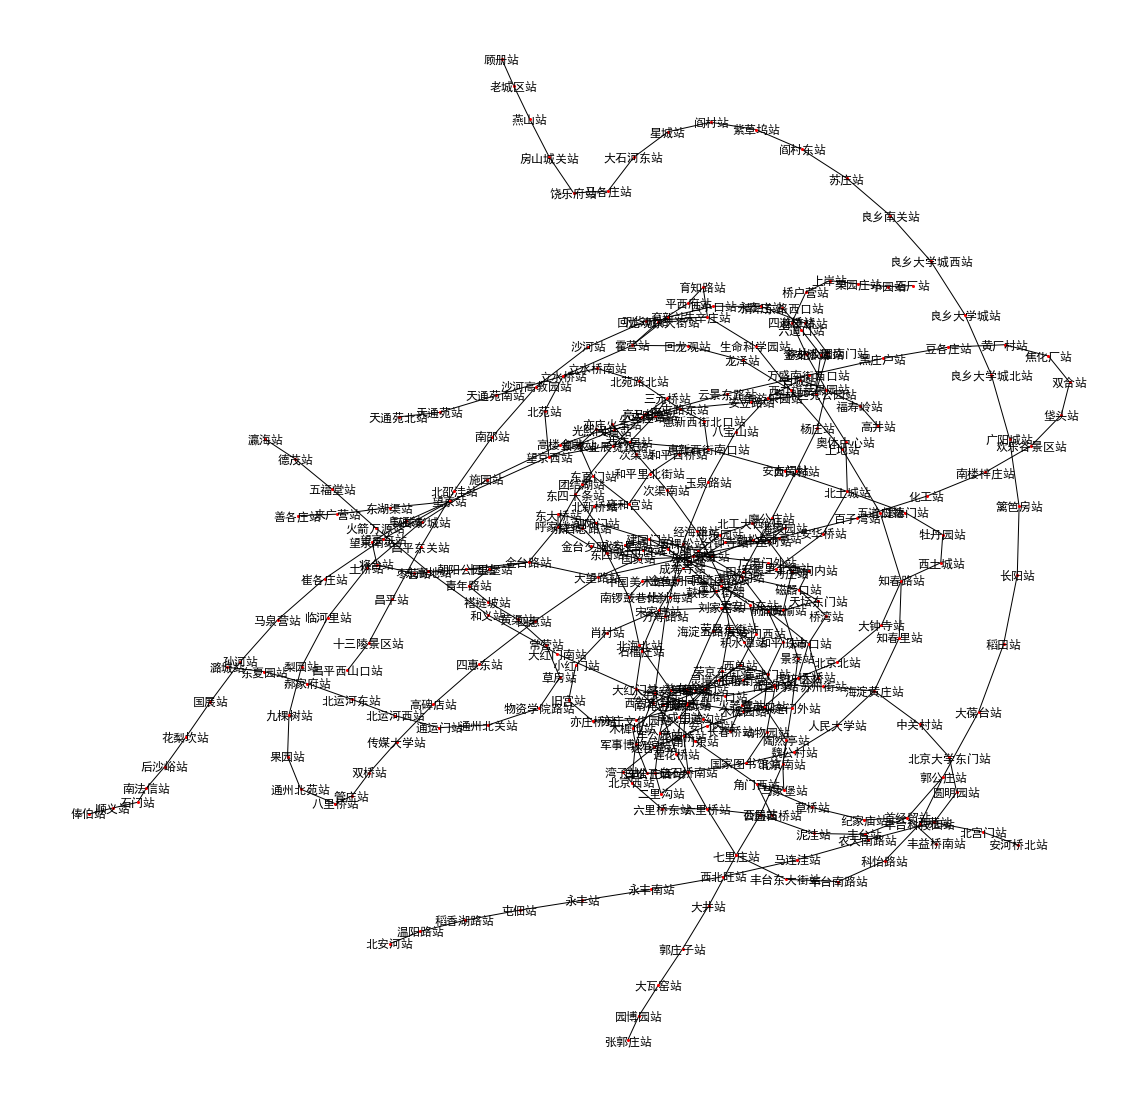

In [418]:
plt.figure(figsize=(15,15))
metro_graph = nx.Graph(metro_dict)
nx.draw(metro_graph,with_labels = True, node_size = 4)

##### 2. Preprocessing data

Some tips:

a. Find a suitable way to save the data you get from the web. (Note: The way you use to save the data should be able to be used to create the graph that your agent is going to explore)

#### 3. Build the search agent

Build the search agent based ont he graph you built.

for example, if you use Beijing subway graoh, and you run:

\>>> search("奥体中心“，”天安门“）

You should get the result as follows: 奥体中心 -> A ->B ->C ... -> 天安门

In [422]:
def search(graph,start,end):
    paths = [[start]]
    visited = set()
    while paths:
        path = paths.pop(0)
        frontier = path[-1]
        if frontier == end:
            return path
        
        stations = list(graph[frontier])
        for station in stations:
            if station in visited:continue
            if station in path:continue
            if station == end:
                return path + [station]
            
            paths.append(path + [station])
        
        visited.add(frontier)

In [425]:
search(metro_dict,'巴沟站','车公庄西站')

['巴沟站', '苏州街站', '海淀黄庄站', '人民大学站', '魏公村站', '国家图书馆站', '白石桥南站', '二里沟站', '车公庄西站']

### (Optional) Improve your agent to make it able to find a path based on different strategies

###  <评阅点> : 是否正确得到不同目标下的路径。

Some ideas you might want to try:

a. Find the shortest path between two stations.

b. Find the path that requires minimum transfers between two stations.

c. Combine the previous two ideas, find a more suitable path.

Compare your results with results obtained by using some apps such as Baidu map, A map, Google map or Apple map. If there is difference, try to explanate it.

In [450]:
#strategy: minimun transfers
def search_strategy(paths, metro_info):
    def get_current_line(station_1,station_2,metro_info):    
        for line,station_lst in metro_info.items():
            if (station_1 in set(metro_info[line])) and (station_1 in set(metro_info[line])):
                return line
    def transfer_cnt(path,metro_info):
        trans_cnt = 0
        start = path[0]
        if len(path)==1 or len(path) == 2:
            return trans_cnt
        
        current_line = get_current_line(start,path[1],metro_info)
        
        for i,station in enumerate(path[2:]):

            if station in set(metro_info[current_line]):
                continue
            else:
                trans_cnt += 1
                start = path[i-1]
                current_line = get_current_line(start,station,metro_info)
                
        return trans_cnt
    
    return sorted(paths, key = lambda x: (transfer_cnt(x,metro_info),len(x))) #sort by transfer number first, then number of stations taken


In [437]:
def optimal_search(graph,start,end,search_strategy):
    paths = [[start]]
    #visited = set()
    while paths:
        path = paths.pop(0)
        frontier = path[-1]
        if frontier == end:
            return path
        
        stations = list(graph[frontier])
        for station in stations:
            #if station in visited:continue
            if station in path:
                continue
            paths.append(path + [station])
        
        paths = search_strategy(paths, metro_info)
        if paths[0][-1] == end:
            return paths[0]
        #visited.add(frontier)

In [439]:
optimal_search(metro_graph,'海淀黄庄站','积水潭站',search_strategy)

['海淀黄庄站', '人民大学站', '魏公村站', '国家图书馆站', '动物园站', '西直门站', '积水潭站']

## Congratulations ! You have finished the assignment of week 2.

![title](img/agent.png)

### If you have any suggestions regarding the teaching, please feel free to send them to my eamil (eric.lee.xiao@gmail.com) 